In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [2]:
df = pd.read_excel('hw2data_with_outliers.xlsx')
df

,Unnamed: 0,Time,Electricity,CMA(12Months),Unnamed: 4,Averaged,Adjusted (Sum=12),Unnamed: 7,Adjusted,Deseasonalized Electricity,MA(3),Abs Error,MA(9),Abs Error.1,Exponential (0.1),Abs Error.2,Exponential (0.1).1,Abs Error.3,Unnamed: 18
0,2011.0,Jan,708.000,NaN,NaN,NaN,NaN,NaN,1.089254,649.985917,NaN,NaN,NaN,NaN,649.985917,0.000000,649.985917,0.000000,857.000000
1,2011.0,Feb,708.000,NaN,NaN,NaN,NaN,NaN,0.819204,864.253203,NaN,NaN,NaN,NaN,649.985917,214.267286,649.985917,214.267286,NaN
2,2011.0,Mar,696.000,NaN,NaN,NaN,NaN,NaN,0.797291,872.956230,NaN,NaN,NaN,NaN,671.412645,201.543584,714.266102,158.690127,NaN
3,2011.0,Apr,636.000,NaN,NaN,NaN,NaN,NaN,0.647613,982.067848,795.731783,186.336065,NaN,NaN,691.567004,290.500844,761.873141,220.194707,NaN
4,2011.0,May,636.000,NaN,NaN,NaN,NaN,NaN,0.773277,822.474046,906.425760,83.951714,NaN,NaN,720.617088,101.856958,827.931553,5.457506,NaN
5,2011.0,Jun,1128.000,NaN,NaN,NaN,NaN,NaN,1.255621,898.360411,892.499375,5.861037,NaN,NaN,730.802784,167.557628,826.294301,72.066111,NaN
6,2011.0,Jul,1476.000,860.000000,1.716279,1.547425,1.547880,NaN,1.547880,953.562547,900.967435,52.595112,NaN,NaN,747.558547,206.004000,847.914134,105.648413,NaN
7,2011.0,Aug,1428.000,862.000000,1.656613,1.599270,1.599740,11.996476,1.599740,892.645239,891.465668,1.179570,NaN,NaN,768.158947,124.486292,879.608658,13.036581,NaN
8,2011.0,Sep,960.000,857.000000,1.120187,1.206281,1.206636,NaN,1.206636,795.600548,914.856066,119.255517,NaN,NaN,780.607576,14.992972,883.519632,87.919084,NaN
9,2011.0,Oct,612.000,849.500000,0.720424,0.708627,0.708835,NaN,0.708835,863.388879,880.602778,17.213899,859.100665,4.288213,782.106873,81.282006,857.143907,6.244972,NaN


In [5]:
df['Index']=df.index+1
df

,Unnamed: 0,Time,Electricity,CMA(12Months),Unnamed: 4,Averaged,Adjusted (Sum=12),Unnamed: 7,Adjusted,Deseasonalized Electricity,MA(3),Abs Error,MA(9),Abs Error.1,Exponential (0.1),Abs Error.2,Exponential (0.1).1,Abs Error.3,Unnamed: 18,Index
0,2011.0,Jan,708.000,NaN,NaN,NaN,NaN,NaN,1.089254,649.985917,NaN,NaN,NaN,NaN,649.985917,0.000000,649.985917,0.000000,857.000000,1
1,2011.0,Feb,708.000,NaN,NaN,NaN,NaN,NaN,0.819204,864.253203,NaN,NaN,NaN,NaN,649.985917,214.267286,649.985917,214.267286,NaN,2
2,2011.0,Mar,696.000,NaN,NaN,NaN,NaN,NaN,0.797291,872.956230,NaN,NaN,NaN,NaN,671.412645,201.543584,714.266102,158.690127,NaN,3
3,2011.0,Apr,636.000,NaN,NaN,NaN,NaN,NaN,0.647613,982.067848,795.731783,186.336065,NaN,NaN,691.567004,290.500844,761.873141,220.194707,NaN,4
4,2011.0,May,636.000,NaN,NaN,NaN,NaN,NaN,0.773277,822.474046,906.425760,83.951714,NaN,NaN,720.617088,101.856958,827.931553,5.457506,NaN,5
5,2011.0,Jun,1128.000,NaN,NaN,NaN,NaN,NaN,1.255621,898.360411,892.499375,5.861037,NaN,NaN,730.802784,167.557628,826.294301,72.066111,NaN,6
6,2011.0,Jul,1476.000,860.000000,1.716279,1.547425,1.547880,NaN,1.547880,953.562547,900.967435,52.595112,NaN,NaN,747.558547,206.004000,847.914134,105.648413,NaN,7
7,2011.0,Aug,1428.000,862.000000,1.656613,1.599270,1.599740,11.996476,1.599740,892.645239,891.465668,1.179570,NaN,NaN,768.158947,124.486292,879.608658,13.036581,NaN,8
8,2011.0,Sep,960.000,857.000000,1.120187,1.206281,1.206636,NaN,1.206636,795.600548,914.856066,119.255517,NaN,NaN,780.607576,14.992972,883.519632,87.919084,NaN,9
9,2011.0,Oct,612.000,849.500000,0.720424,0.708627,0.708835,NaN,0.708835,863.388879,880.602778,17.213899,859.100665,4.288213,782.106873,81.282006,857.143907,6.244972,NaN,10


In [15]:
y = df['Deseasonalized Electricity'][:71]
X = df['Index'][:71]
X = sm.add_constant(X)

In [16]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Deseasonalized Electricity   R-squared:                       0.100
Model:                                    OLS   Adj. R-squared:                  0.087
Method:                         Least Squares   F-statistic:                     7.632
Date:                        Sun, 15 Sep 2019   Prob (F-statistic):            0.00735
Time:                                15:29:34   Log-Likelihood:                -458.05
No. Observations:                          71   AIC:                             920.1
Df Residuals:                              69   BIC:                             924.6
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        880.6933     37.306     23.607      0.000     806.270     955.116
Index         -2.4879      0.901     -2.763      0.007      -4.284      -0.691
==============================================================================
Omnibus:                        3.759   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                2.941
Skew:                           0.380   Prob(JB):                        0.230
Kurtosis:                       3.646   Cond. No.                         83.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0, 0.5, 'Electricy')

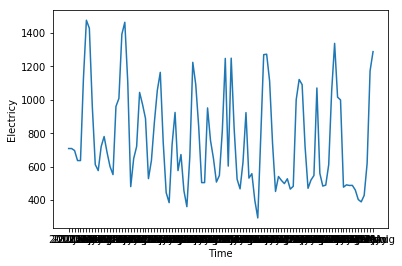

In [19]:
plt.plot(df[df.columns[3]],df[df.columns[2]])
plt.xlabel('Time')
plt.ylabel('Electricy')